# Predicting sentiment from product reviews

# Fire up GraphLab Create
dataset https://d396qusza40orc.cloudfront.net/phoenixassets/amazon_baby.csv

In [1]:
import pandas as pd
import numpy as np

# Read some product review data

Loading reviews for a set of baby products. 

In [2]:
products = pd.read_csv('amazon_baby.csv',dtype={'name':str,'review':str,'rating':np.int64})

# Let's explore this data together

Data includes the product name, the review text and the rating of the review. 

In [3]:
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


# Build the word count vector for each review

In [4]:
from sklearn.feature_extraction.text import CountVectorizer 

In [5]:
products['review'] = products['review'].fillna('')
vectorizer = CountVectorizer()
analyzer = vectorizer.build_analyzer()

In [6]:
def word_counts(s):
    ans = {}
    if analyzer(s):
        di = {}
        weight = vectorizer.fit_transform([s]).toarray()
        voc = vectorizer.vocabulary_
        for k,v in voc.items():
            di[v]=k
        for index,i in enumerate(weight[0]):
            ans[di[index]] = i
    return  ans

In [7]:
products['word_count'] = products['review'].apply(word_counts)

In [8]:
products.head()

,name,review,rating,word_count
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,"{u'and': 5, u'stink': 1, u'because': 1, u'orde..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{u'and': 3, u'love': 1, u'it': 3, u'highly': 1..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{u'and': 2, u'would': 1, u'quilt': 1, u'it': 1..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{u'and': 3, u'ingenious': 1, u'love': 2, u'wha..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{u'and': 2, u'all': 2, u'love': 1, u'help': 1,..."


In [9]:
#graphlab.canvas.set_target('ipynb')

In [10]:
#products['name'].show()

# Examining the reviews for most-sold product:  'Vulli Sophie the Giraffe Teether'

In [11]:
giraffe_reviews = products[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [12]:
len(giraffe_reviews)

785

In [13]:
giraffe_reviews['rating'].value_counts()

5    535
4     95
3     62
1     56
2     37
Name: rating, dtype: int64

In [14]:
giraffe_reviews['rating'].value_counts().plot(kind='barh',color='g',alpha=0.5)

# Build a sentiment classifier

In [15]:
products['rating'].value_counts()

5    107054
4     33205
3     16779
1     15183
2     11310
Name: rating, dtype: int64

In [16]:
products['rating'].value_counts().plot(kind='barh',color='g',alpha=0.5)

## Define what's a positive and a negative sentiment

We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment.  Reviews with a rating of 4 or higher will be considered positive, while the ones with rating of 2 or lower will have a negative sentiment.   

In [17]:
# ignore all 3* reviews
products = products[products['rating'] != 3]

In [18]:
# positive sentiment = 4* or 5* reviews
products['sentiment'] = products['rating'] >=4

In [19]:
products.head()

,name,review,rating,word_count,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{u'and': 3, u'love': 1, u'it': 3, u'highly': 1...",True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{u'and': 2, u'would': 1, u'quilt': 1, u'it': 1...",True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{u'and': 3, u'ingenious': 1, u'love': 2, u'wha...",True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{u'and': 2, u'all': 2, u'love': 1, u'help': 1,...",True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{u'and': 2, u'cute': 1, u'would': 1, u'help': ...",True


## Let's train the sentiment classifier

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [21]:
train_data,test_data = train_test_split(products,train_size=0.8,random_state=0)

In [22]:
sentiment_model = LogisticRegression()
vectorizer.fit(products['review'])

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [23]:
X = vectorizer.transform(train_data['review'])
y = train_data['sentiment']
sentiment_model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Evaluate the sentiment model

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def metric_roc_curve(fpr,tpr,roc_auc):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [26]:
pred = sentiment_model.predict_proba(vectorizer.transform(test_data['review']))[:,1]

In [27]:
fpr,tpr,_ = roc_curve(test_data['sentiment'].values,pred)
roc_auc = auc(fpr,tpr)

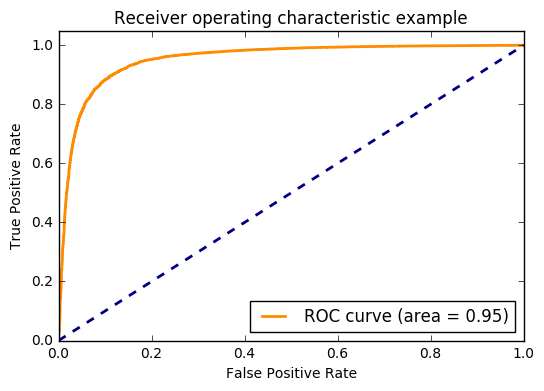

In [28]:
metric_roc_curve(fpr,tpr,roc_auc)

In [29]:
#sentiment_model.evaluate(test_data, metric='roc_curve')

In [30]:
#sentiment_model.show(view='Evaluation')

# Applying the learned model to understand sentiment for Giraffe

In [31]:
giraffe_reviews['predicted_sentiment'] = sentiment_model.predict_proba(vectorizer.transform(giraffe_reviews['review']))[:,1]

In [32]:
giraffe_reviews.head()

,name,review,rating,word_count,predicted_sentiment
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,"{u'and': 1, u'all': 1, u'because': 1, u'it': 1...",0.998634
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,"{u'and': 1, u'right': 1, u'help': 1, u'just': ...",0.999219
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,"{u'and': 2, u'all': 1, u'there': 2, u'being': ...",0.200927
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5,"{u'and': 2, u'all': 1, u'love': 1, u'have': 1,...",0.960551
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,"{u'and': 3, u'the': 3, u'all': 1, u'there': 1,...",0.731981


## Sort the reviews based on the predicted sentiment and explore

In [33]:
giraffe_reviews = giraffe_reviews.sort_values(by = 'predicted_sentiment', ascending=False)

In [34]:
giraffe_reviews.head()

,name,review,rating,word_count,predicted_sentiment
34892,Vulli Sophie the Giraffe Teether,"Sophie, oh Sophie, your time has come. My gran...",5,"{u'giggles': 1, u'all': 1, u'since': 1, u'brin...",1.0
34434,Vulli Sophie the Giraffe Teether,My Mom-in-Law bought Sophie for my son when he...,5,"{u'son': 4, u'think': 1, u'they': 1, u'just': ...",1.0
34515,Vulli Sophie the Giraffe Teether,"As every mom knows, you always want to give yo...",5,"{u'cute': 1, u'all': 1, u'just': 2, u'money': ...",1.0
34975,Vulli Sophie the Giraffe Teether,My 8 week old LOVES Sophie. The rubber feels s...,5,"{u'accurate': 1, u'horns': 1, u'mommies': 1, u...",1.0
34442,Vulli Sophie the Giraffe Teether,"Yes, it\'s imported. Yes, it\'s expensive. And...",5,"{u'help': 1, u'over': 2, u'month': 1, u'four':...",1.0


## Most positive reviews for the giraffe

In [35]:
#giraffe_reviews.iloc[0]['review']

In [36]:
#giraffe_reviews.iloc[1]['review']

## Show most negative reviews for giraffe

In [37]:
#giraffe_reviews.iloc[-1]['review']

In [38]:
#giraffe_reviews.iloc[-2]['review']

# Question 1

In [39]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

In [40]:
def selected_count(dic,word):
    if word in dic:
        return dic[word]
    else:
        return 0

In [41]:
for word in selected_words:
    products[word] = products['word_count'].apply(selected_count,args=(word,))

In [42]:
word_sum = products[selected_words].sum()

In [43]:
print word_sum.argmax(),word_sum.argmin()

great wow


# Question 2

In [44]:
train_data,test_data = train_test_split(products,train_size=0.8,random_state=0)
features = selected_words

In [45]:
selected_words_model = LogisticRegression()

In [46]:
X = train_data[features]
y = train_data['sentiment'].T

In [47]:
selected_words_model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
coeff = pd.DataFrame({'name':selected_words,'value':selected_words_model.coef_[0]})

In [49]:
coeff.sort_values(by='value',ascending=False)

,name,value
4,love,1.380930
0,awesome,1.171903
3,amazing,1.054181
2,fantastic,0.900392
1,great,0.865964
9,wow,-0.097348
6,bad,-0.975250
10,hate,-1.433518
8,awful,-2.055797
7,terrible,-2.209991


# Question 3

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
sentiment_model_pred = sentiment_model.predict(vectorizer.transform(test_data['review']))

In [52]:
accuracy_score(test_data['sentiment'],sentiment_model_pred)

0.9297772180744206

In [53]:
selected_words_model_pred = selected_words_model.predict(test_data[features])

In [54]:
accuracy_score(test_data['sentiment'],selected_words_model_pred)

0.8458217144913196

In [55]:
test_data['sentiment'].describe()

count     33351
unique        2
top        True
freq      27989
Name: sentiment, dtype: object

In [56]:
accuracy_score(test_data['sentiment'],np.ones(test_data['sentiment'].shape))

0.83922521063836164

# Question 4

In [57]:
diaper_champ_reviews = products[products.name=='Baby Trend Diaper Champ']

In [58]:
diaper_champ_reviews['predicted_sentiment']= sentiment_model.predict_proba(vectorizer.transform(diaper_champ_reviews['review']))[:,1]

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [59]:
diaper_champ_reviews.sort_values(by='predicted_sentiment',ascending=False)

,name,review,rating,word_count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,predicted_sentiment
376,Baby Trend Diaper Champ,"This is absolutely, by far, the best diaper pa...",5,"{u'lysol': 2, u'just': 3, u'money': 1, u'smell...",True,0,0,0,0,2,0,0,0,0,0,0,1.000000
320,Baby Trend Diaper Champ,I originally put this item on my baby registry...,5,"{u'lysol': 1, u'all': 4, u'feedback': 1, u'jus...",True,0,0,0,0,0,0,0,0,0,0,0,1.000000
414,Baby Trend Diaper Champ,We have been using our Diaper Champ for almost...,5,"{u'son': 3, u'all': 3, u'humid': 1, u'consider...",True,0,0,0,0,0,0,0,0,0,0,0,1.000000
571,Baby Trend Diaper Champ,We did alot of research on diaper pails before...,2,"{u'saying': 1, u'just': 1, u'over': 1, u'mainl...",False,0,0,0,0,0,0,0,0,0,0,0,1.000000
420,Baby Trend Diaper Champ,Baby Luke can turn a clean diaper to a dirty d...,5,"{u'all': 1, u'less': 1, u'nursery': 1, u'absol...",True,0,1,0,0,0,0,0,0,0,0,0,1.000000
451,Baby Trend Diaper Champ,"As a first time mother, I wanted to get the be...",5,"{u'and': 2, u'love': 1, u'questions': 1, u'fig...",True,0,0,0,0,1,0,0,0,0,0,0,0.999999
328,Baby Trend Diaper Champ,Diaper Champ or Diaper Genie? That was my dile...,5,"{u'son': 3, u'all': 1, u'before': 1, u'differe...",True,0,1,0,0,0,0,0,0,0,0,0,0.999999
604,Baby Trend Diaper Champ,I have been using this diaper pail for 41/2 mo...,5,"{u'and': 4, u'all': 1, u'least': 1, u'love': 1...",True,0,2,0,0,1,0,0,0,0,0,0,0.999999
477,Baby Trend Diaper Champ,The boy is now 1 year old and we have had it s...,4,"{u'when': 2, u'pleased': 1, u'before': 1, u'pe...",True,0,1,0,0,0,0,1,0,0,0,0,0.999998
491,Baby Trend Diaper Champ,I can\'t say enough good things about the Cham...,5,"{u'son': 4, u'anyway': 1, u'years': 2, u'messy...",True,0,0,0,0,1,0,0,0,0,0,0,0.999998


In [60]:
diaper_champ_reviews['predicted_sentiment2']= selected_words_model.predict_proba(diaper_champ_reviews[features])[:,1]

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [61]:
diaper_champ_reviews.sort_values(by='predicted_sentiment2',ascending=False)

,name,review,rating,word_count,sentiment,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,predicted_sentiment,predicted_sentiment2
329,Baby Trend Diaper Champ,I LOVE LOVE LOVE this product! It is SO much e...,4,"{u'rating': 1, u'contacted': 1, u'over': 1, u'...",True,0,1,0,0,3,0,0,0,0,0,0,0.999600,0.998251
459,Baby Trend Diaper Champ,"Love it, love it, love it! This lives up to t...",5,"{u'all': 1, u'already': 1, u'love': 3, u'purch...",True,0,0,0,0,3,0,0,0,0,0,0,0.994654,0.995853
446,Baby Trend Diaper Champ,I received my Diaper Champ at my baby shower f...,5,"{u'and': 4, u'love': 3, u'want': 1, u'do': 1, ...",True,0,0,0,0,3,0,0,0,0,0,0,0.992886,0.995853
367,Baby Trend Diaper Champ,"Let me just say, I LOVE THIS PRODUCT!! I used...",5,"{u'all': 1, u'just': 3, u'over': 1, u'yes': 3,...",True,0,1,1,0,1,0,0,0,0,0,0,0.999952,0.988857
604,Baby Trend Diaper Champ,I have been using this diaper pail for 41/2 mo...,5,"{u'and': 4, u'all': 1, u'least': 1, u'love': 1...",True,0,2,0,0,1,0,0,0,0,0,0,0.999999,0.988471
426,Baby Trend Diaper Champ,I love this diaper pale and wouldn\'t dream of...,5,"{u'and': 3, u'love': 1, u'is': 2, u'it': 3, u'...",True,0,2,0,0,1,0,0,0,0,0,0,0.995508,0.988471
394,Baby Trend Diaper Champ,Works great - no smells. LOVE that it uses re...,5,"{u'and': 2, u'love': 1, u'garbage': 1, u'waste...",True,0,2,0,0,1,0,0,0,0,0,0,0.998997,0.988471
456,Baby Trend Diaper Champ,I love this diaper pail. It keeps the diapers ...,4,"{u'and': 1, u'love': 2, u'dont': 1, u'extra': ...",True,0,0,0,0,2,0,0,0,0,0,0,0.999133,0.983703
559,Baby Trend Diaper Champ,I\'ve worked with kids more than half my life....,5,"{u'and': 4, u'genies': 1, u'all': 1, u'because...",True,0,0,0,0,2,0,0,0,0,0,0,0.999991,0.983703
469,Baby Trend Diaper Champ,I have a 10 year old daughter and an 8 month o...,5,"{u'lysol': 1, u'all': 1, u'just': 2, u'over': ...",True,0,0,0,0,2,0,0,0,0,0,0,0.999853,0.983703
